# Checkpoint 2
Please execute the code below

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# Data exploration

## Introduction
Display the first rows of the dataset.

In [2]:
# Your code here : 
df_music.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814


Describe the dataset including all types of columns (i.e. numerical and the others) and comment the column popularity.

In [3]:
# Your code here : 
df_music.describe(include = ['float', 'int', 'object'])

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232725,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148615,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,3uSSjnDMmoyERaAK9KvpJR,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


**Popularity** count **232725 values** reparted **from 0 to 100 *(min, max)***. The **average *(mean)*** popularity is **41.13** with a **standard deviation *(std)* of 18.19**. The **median** value is **43**, it's mean that *50% of the population (songs) have a popularity value under or equal to 43*. The **firt quarter and the third are respectively 29 and 55**, *that mean that 25% of the songs have a popularity values under or equal to 29 and 75% of them have a popularity value under or equal to 55*. 

Please check the presense / absence of missing values in each column and comment your result.

In [4]:
# Your code here : 
print('.info() method:')
df_music.info()

print('.isna() method')
df_music.isna().sum()

.info() method:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

.info() method
--
The print show that we have 232725 entries in the table and show the number of *non-null* entries for each columns. We see that the number of *non-null* entries correspond to the number of entries. 

.isna() method
--
The .isna method return a table this bool operator: **True** is the entrie is an NaN and **False** is not. 
The .sum() compute the sum of **True *(= 1)*** present in each columns. 

## Some insights about the artists
Give the number of tracks for each artist. The result will be sorted by descending order for a better readability.

In [5]:
# Your code here : 
import numpy as np

pd.pivot_table(data = df_music, values = 'track_id', index = 'artist_name', aggfunc = 'count').sort_values(by = 'track_id', ascending = False)

,track_id
artist_name,
Giuseppe Verdi,1394
Giacomo Puccini,1137
Kimbo Children's Music,971
Nobuo Uematsu,825
Richard Wagner,804
...,...
Melanie De Biasio,1
Mel Tillis,1
Mel Levin,1



Give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [6]:
# Your code here : 
pop_by_artist = pd.pivot_table(data = df_music, values = 'popularity', index = 'artist_name', aggfunc = 'mean').sort_values(by = 'popularity', ascending = False)
pop_by_artist

,popularity
artist_name,
Pedro Capó,87.0
Mario Bautista,85.0
Mau y Ricky,83.0
Kris Kross Amsterdam,82.0
Ninho,82.0
...,...
Brent Holmes,0.0
The Wayfarers,0.0
Nursery Rhymes Club,0.0


In [7]:
pop_by_artist.head(3)

,popularity
artist_name,
Pedro Capó,87.0
Mario Bautista,85.0
Mau y Ricky,83.0


For the genre 'Pop' only, give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [8]:
# Your code here : 
pop_by_POP_artist = pd.pivot_table(data = df_music[df_music['genre'] == 'Pop'], values = 'popularity', index = 'artist_name', aggfunc = 'mean').sort_values(by = 'popularity', ascending = False)
pop_by_POP_artist

,popularity
artist_name,
Mabel,91.000000
Pedro Capó,87.000000
ChocQuibTown,86.000000
Mario Bautista,85.000000
Tropkillaz,85.000000
...,...
Lucius,54.000000
Lisa Hannigan,54.000000
Ava Max,48.090909


In [9]:
pop_by_POP_artist.head(3)

,popularity
artist_name,
Mabel,91.0
Pedro Capó,87.0
ChocQuibTown,86.0


## What about Queen ?
Give the track names of Queen ?

In [10]:
# Your code here : 
df_music['track_name'][df_music['artist_name'] == 'Queen']

152988                          We Are The Champions
153284         Get Down, Make Love - Remastered 2011
153622          Sheer Heart Attack - Remastered 2011
153734          Seaside Rendezvous - Remastered 2011
154806    Sleeping On The Sidewalk - Remastered 2011
                             ...                    
225833                            Fat Bottomed Girls
225906          All Dead, All Dead - Remastered 2011
226106                              Somebody To Love
226296      No-One But You (Only The Good Die Young)
226415      Thank God It's Christmas - 2011 Remaster
Name: track_name, Length: 97, dtype: object

In [11]:
# or
df_music['track_name'][df_music['artist_name'] == 'Queen'].unique()

array(['We Are The Champions', 'Get Down, Make Love - Remastered 2011',
       'Sheer Heart Attack - Remastered 2011',
       'Seaside Rendezvous - Remastered 2011',
       'Sleeping On The Sidewalk - Remastered 2011',
       'Keep Yourself Alive - Long Lost Retake / June 1975 / Remastered 2011',
       "I Can't Live With You - Remastered 2011",
       'God Save The Queen - Remastered 2011',
       'We Are The Champions - Raw Sessions Version', 'Hammer To Fall',
       'Good Company - Remastered 2011',
       'Dragon Attack - Remastered 2011',
       "The Prophet's Song - Remastered 2011",
       'Bohemian Rhapsody - Remastered 2011',
       "Don't Stop Me Now - Remastered", 'Under Pressure - Remastered',
       'Somebody To Love - Remastered 2011',
       'We Will Rock You - Remastered', 'Killer Queen - Remastered 2011',
       'We Are The Champions - Remastered 2011',
       'Radio Ga Ga - Remastered', 'Love Of My Life - Remastered 2011',
       'I Want To Break Free - Remastered 201

What are the popularity of all songs from the Queen band ?

What are the 3 most popular ?

In [12]:
# Your code here : 
pop_Queen_songs = df_music[['track_name', 'popularity']][df_music['artist_name'] == 'Queen'].sort_values(by = 'popularity', ascending = False)
pop_Queen_songs

,track_name,popularity
166058,Bohemian Rhapsody - Remastered 2011,82
166059,Don't Stop Me Now - Remastered,81
166069,Somebody To Love - Remastered 2011,77
166067,Under Pressure - Remastered,77
166070,We Will Rock You - Remastered,76
...,...,...
156379,The Prophet's Song - Remastered 2011,47
156082,Dragon Attack - Remastered 2011,47
156061,Good Company - Remastered 2011,47
155864,Hammer To Fall,47


In [13]:
pop_Queen_songs.head(3)

,track_name,popularity
166058,Bohemian Rhapsody - Remastered 2011,82
166059,Don't Stop Me Now - Remastered,81
166069,Somebody To Love - Remastered 2011,77


## What about Kanye West ?
Give the track names of Kanye West ?

What are the 3 most popular ?

In [14]:
df_music['artist_name'][df_music.artist_name.str.lower().str.contains('kanye')].unique()

array(['Kanye West'], dtype=object)

In [15]:
# Your code here : 
pop_KW_songs = df_music[['track_name', 'popularity']][df_music['artist_name'] == 'Kanye West'].sort_values(by = 'popularity', ascending = False)
pop_KW_songs.drop_duplicates(inplace = True)
pop_KW_songs

,track_name,popularity
87006,I Love It (& Lil Pump),87
87106,Gold Digger,80
108340,POWER,79
87120,All Mine,78
108331,Heartless,77
...,...,...
120908,POWER - Album Version (Edited),47
122267,Homecoming - (Explicit),46
122015,New God Flow.1,46
121990,Don't Like.1 - Album Version (Edited),46


In [16]:
pop_KW_songs.head(3)

,track_name,popularity
87006,I Love It (& Lil Pump),87
87106,Gold Digger,80
108340,POWER,79


## Transform
Create a new column 'nb_words', with the number of words in each title (track names). It's up to you to choose if punctuation is a word or not.

In [17]:
# Your code here : 
df_music['nb_words'] = df_music['track_name'].apply(lambda x: len(x.split(' ')))
df_music['nb_words']

0         6
1         5
2         6
3         4
4         1
         ..
232720    3
232721    2
232722    5
232723    3
232724    7
Name: nb_words, Length: 232725, dtype: int64

## Pivot table
Let's do a pivot table with genre in lines, key in columns and number of songs in values.

In [18]:
df_music.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'nb_words'],
      dtype='object')

In [19]:
# Your code here : 
pd.pivot_table(data = df_music, values = 'track_name', index = 'genre', columns = 'key', aggfunc = 'count')

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
genre,,,,,,,,,,,,
A Capella,9,10,10,15,8,13,5,6,14,4,15,10
Alternative,865,510,844,1045,972,981,265,705,703,727,1024,622
Anime,868,537,658,1041,810,953,297,683,855,607,1037,590
Blues,1233,458,610,1175,520,1150,224,751,801,365,1311,425
Children's Music,495,340,201,979,227,731,211,405,614,136,834,230
Children’s Music,905,531,855,1065,965,978,269,732,692,730,1004,627
Classical,853,664,440,1112,730,1122,578,805,901,443,1138,470
Comedy,823,813,647,558,1489,903,415,753,802,1238,676,564
Country,927,464,598,946,619,1090,313,834,607,560,1207,499


## Correlation matrix
Give the correlation matrix for a full understanding of our dataset.

In [20]:
# Your code here : 
df_music.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,nb_words
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,-0.226041
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.297207
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.229582
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811,0.108421
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.287224
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.119395
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.044689
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.338822
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.047410
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.086280


# Dataviz

## Remember, each chart must have :
- beautiful colors
- title
- readable axis ticks
- legend

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

## Display a correlation heatmap.
Color scale has to be center on 0-value, in order to distinguish negative and positive values. Please choose a beautiful palette, and remember to display a title.


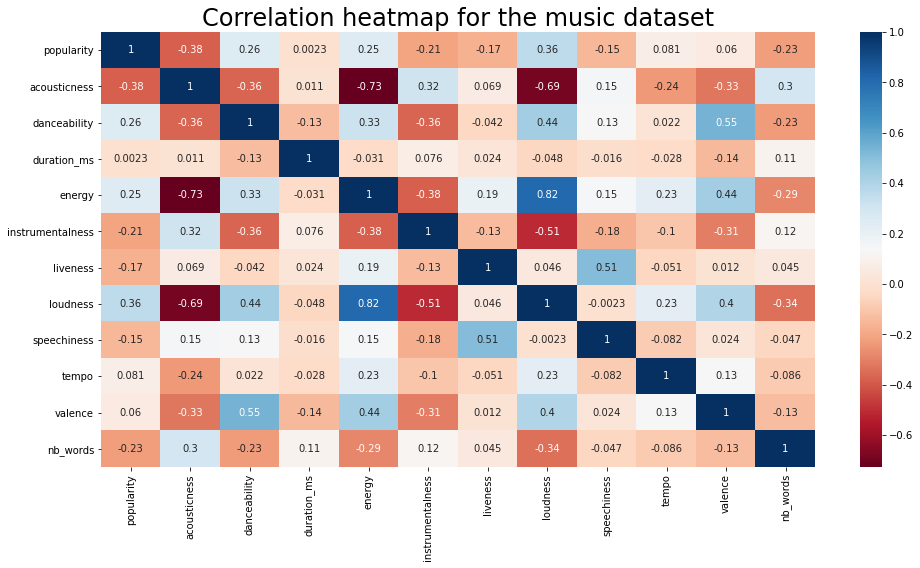

In [22]:
# Your code here :
df_corr = df_music.corr()

fig = plt.subplots(figsize = (16, 8))
_ = sns.heatmap(df_corr, annot=True, cmap = 'RdBu')
_ = plt.title('Correlation heatmap for the music dataset', fontdict = {'fontsize': 24})
plt.show()

Some columns seems to have a strong (negative) correlations. 
- Which ones ? 
- What does it means ?

My answers here:
--
____

***Which ones?:***

- **acousticness** seem to have strong negative correlation with **loudness (*-.69*)** and **energy (*-.73*)**.

- **loudness** also seem to have an important negative correlation with **instrumentalness (*-.51)**.

***What does it means ?***

A strong negative correlation means that when the values of one variable grow up, the values of the second one fall down. 

*e.g., when the acousticness of a song is high, it's engergy is low*. 



## Find the correlation coefficient between Energy and Acousticness

In [23]:
# Your code here :
df_corr.loc['energy', 'acousticness']

-0.7255763647090392

## Pairplot
Only for genres Opera and Reggaeton, display a pairplot which different colors for genres (so you'll have 2 colors).

In [24]:
# Your code here :
plt_data = df_music[(df_music['genre'] == 'Opera') | (df_music['genre'] == 'Reggaeton')]
_ = sns.pairplot(plt_data, hue = 'genre')
_ = plt.title('Variables relation for Opera and Reggaeton', fontdict = {'fontsize': 24})
_ = plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Scatterplot
Draw a scatterplot on the columns of your choice:
- Filter only on genres Opera and Reggaeton
- Differents colors for genres
- Please choose beautiful colors, and remember to display a title.

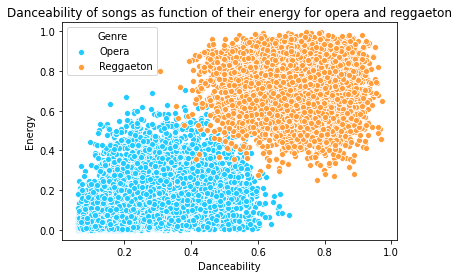

In [25]:
# Your code here :
_ = sns.scatterplot(x = 'danceability', y = 'energy', data = plt_data[plt_data['genre'] == 'Opera'], color = '#21CBFF', label = 'Opera')
_ = sns.scatterplot(x = 'danceability', y = 'energy', data = plt_data[plt_data['genre'] != 'Opera'], color = '#FF9D3B', label = 'Reggaeton')
_ = plt.title('Danceability of songs as function of their energy for opera and reggaeton', fontdict = {'fontsize': 12})
_ = plt.legend(title = 'Genre')
_ = plt.xlabel('Danceability')
_ = plt.ylabel('Energy')
_ = plt.show()

## Boxplot
Draw on the same figure 2 boxplots : 1 by genre.
- Boxplots have to be in vertical
- Filter only on genres Opera and Reggaeton
- Your boxplots represent danceability

Your chart must be similar to this one (without the red arrow)

![boxplot](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_boxplot.png)

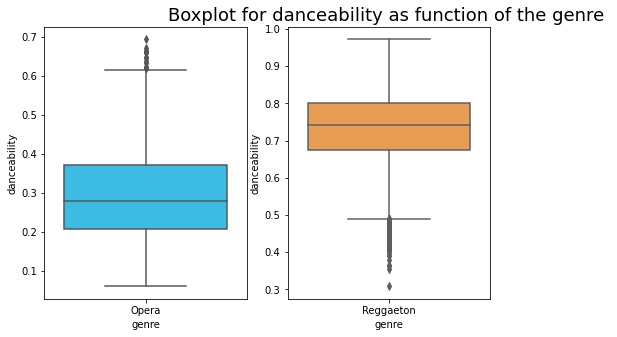

In [26]:
# Your code here :
fig = plt.subplots(figsize = (8, 5))
ax1 = plt.subplot(121)
ax1 = sns.boxplot(x = 'genre', y = 'danceability', data = plt_data[plt_data['genre'] == 'Opera'], color = '#21CBFF')

ax2 = plt.subplot(122)
ax2 = sns.boxplot(x = 'genre', y = 'danceability', data = plt_data[plt_data['genre'] != 'Opera'], color = '#FF9D3B')

fig = plt.title('Boxplot for danceability as function of the genre ', fontdict = {'fontsize':18, 'verticalalignment':'baseline', 'horizontalalignment': 'center'})
plt.show()

How do we read it ?
- What does the horizontal line near the red arrow represent?

**Answer:**

The line at the red arrow represent the **third quarter**, it's means that 75% of the population in this sample (*i.e.,* our songs) have a danceability score under or equal to this value. 

## Histogram
Draw a histogram for the distribution of "energy", only for the genre 'Country'

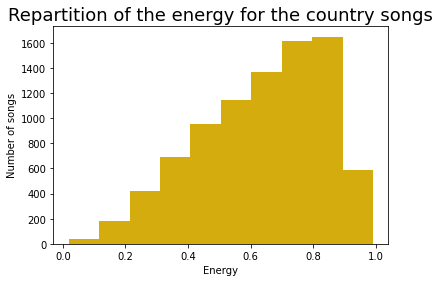

In [27]:
# Your code here :
_ = plt.hist(df_music['energy'][df_music['genre'] == 'Country'], color = '#D4AC0D')
_ = plt.title('Repartition of the energy for the country songs', fontdict = {'fontsize':18})
_ = plt.xlabel('Energy')
_ = plt.ylabel('Number of songs')
_ = plt.show()

## Comparison between the top 1% popularity and the total dataset
Find a way to compare songs with highest popularity and the others. Something like this example, but you could be creative.

Here we've compared the frequencies by genre (35% of top-songs are "pop", versus 4% of pop songs in the total dataset)


![comparison](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_comparison.png)

In [28]:
# Your code here :
data_pop = df_music[['genre', 'popularity']].sort_values(by = 'popularity', ascending = False).iloc[:232, :]
data_pop.drop_duplicates(inplace = True)


data_pop = pd.pivot_table(data_pop, values = 'popularity', index = 'genre', aggfunc='count').sort_values(by = 'popularity', ascending = False)

data_pop['freq'] = data_pop['popularity'].apply(lambda x: x/data_pop['popularity'].sum()*100)

data_pop

,popularity,freq
genre,,
Pop,14,20.588235
Dance,13,19.117647
Rap,12,17.647059
Hip-Hop,10,14.705882
Reggaeton,9,13.235294
Rock,4,5.882353
R&B,3,4.411765
Indie,2,2.941176
Electronic,1,1.470588


## Interactive chart
With plotly express, draw an interactive histogram on energy, with a strip by genre.

In [29]:
# Your code here :
import plotly.express as px

fig = px.histogram(df_music.sort_values(by = 'genre'), x = "energy", color = 'genre')

fig.update_layout(
    title = {'text': 'Repartition of songs energy as function of their genre',
              'y':0.995,
              'x':0.5,
              'xanchor': 'center',
              'yanchor': 'top'},
    xaxis_title="Energy score",
    yaxis_title="Number of songs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Machine Learning : Regression
In this part we will try to predict the **"loudness"** of a track. 

## Univariate regression
First we will train a univariate linear regression model.

Find the most correlated column.

In [30]:
# Your code here :
loudness_corr = df_corr['loudness'].sort_values(ascending = False)

print('Max positive correlations:\n', loudness_corr.head(3), '\n')
print('Max negative correlations:\n', loudness_corr.tail(3))

Max positive correlations:
 loudness        1.000000
energy          0.816088
danceability    0.438668
Name: loudness, dtype: float64 

Max negative correlations:
 nb_words           -0.338822
instrumentalness   -0.506320
acousticness       -0.690202
Name: loudness, dtype: float64


The most correlated column with loudness is **energy (*.81*)** 


Split your dataset into a train and test set (using 80% as train and 20% as test). 

Use a `random_state` of **1** (for reproductivity sake).

In [31]:
# Your code here :
from sklearn.model_selection import train_test_split

X = df_music[['energy']]
y = df_music['loudness']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.8)
print("The lenght of the initial dataset is :", len(X))
print("The lenght of the train dataset is   : {} ({}%)".format(len(X_train), len(X_train)/len(X)*100))
print("The lenght of the test dataset is    : {}  ({}%)".format(len(X_test), len(X_test)/len(X)*100))

The lenght of the initial dataset is : 232725
The lenght of the train dataset is   : 186180 (80.0%)
The lenght of the test dataset is    : 46545  (20.0%)


Now train your model on the train set.

In [0]:
# Your code here :
univariate_model = LinearRegression().fit(X_train, y_train)

And evaluate it on the test set. If you did everything right your score should be `0.6689508695872618`.

In [33]:
# Your code here :
score = univariate_model.score(X_test, y_test)

print("Score for the Test dataset : ", score)

Score for the Test dataset :  0.6689508695872618


Visualize your data with a scatter plot (different colors for the train and the test set).

Add a lineplot of the regression.

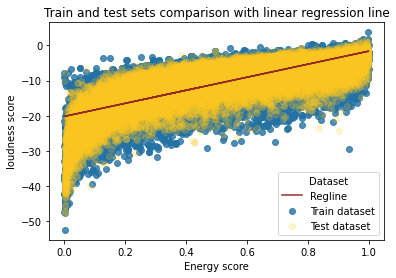

In [34]:
# Your code here :
y_test_regline = X_test * univariate_model.coef_ + univariate_model.intercept_

_ = plt.scatter(X_train, y_train, color = '#2471A3', label = 'Train dataset', alpha = .8) 
_ = plt.scatter(X_test, y_test, color = '#FFC921', label = 'Test dataset', alpha = .2) 
_ = plt.plot(X_test, y_test_regline, color = '#922B21', label = 'Regline')
_ = plt.title('Train and test sets comparison with linear regression line')
_ = plt.xlabel('Energy score')
_ = plt.ylabel('loudness score')
_ = plt.legend(title = 'Dataset')

Print the equation of the regression.

In [35]:
# Replace a and b by the coefficients
print("y = {} * x + {}".format(univariate_model.coef_, univariate_model.intercept_))

y = [18.56775242] * x + -20.171580657530956


Use two different method to predict the "**loudness**" for a an energy of 0.62.

In [36]:
# Your code here :
# Hand calculation :
print("By hand      :", univariate_model.coef_ * 0.62 + univariate_model.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :", univariate_model.predict([[0.62]])  )

By hand      : [-8.65957415]
Scikit-Learn : [-8.65957415]


## Multivariate regression

Now you will predict the **loudness** of a track with all the others numericals columns.

You will do all the needed steps and keep a `random_state` of 1.

Your score should be : `0.7650705916016727`

In [0]:
columns =["acousticness", "danceability", "duration_ms", "energy",
          "instrumentalness", "liveness", "popularity", "speechiness", "tempo", "valence"]

### Split train and test datasets

In [38]:
X = df_music[columns]
y = df_music['loudness']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.8)
print("The lenght of the initial dataset is :", len(X))
print("The lenght of the train dataset is   : {} ({}%)".format(len(X_train), len(X_train)/len(X)*100))
print("The lenght of the test dataset is    : {}  ({}%)".format(len(X_test), len(X_test)/len(X)*100))

The lenght of the initial dataset is : 232725
The lenght of the train dataset is   : 186180 (80.0%)
The lenght of the test dataset is    : 46545  (20.0%)


### Model training on train dataset

In [0]:
multivariate_model = LinearRegression().fit(X_train, y_train)

### Multivariate model score

In [40]:
multivariate_model.score(X_test, y_test)

0.7650705916016727

# Classification

Train a KNN-model that predict the genre of a track with wichever columns and means you want.

Try to get the best score!!!

### Choose variables

In [0]:
X = df_music[['popularity', 'acousticness', 'danceability', 'duration_ms', 
              'energy', 'instrumentalness', 'liveness', 'loudness', 
              'speechiness', 'tempo', 'valence', 'nb_words']]

y = df_music['genre']

### Split train and test datasets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.8)
print("The lenght of the initial dataset is :", len(X))
print("The lenght of the train dataset is   : {} ({}%)".format(len(X_train), len(X_train)/len(X)*100))
print("The lenght of the test dataset is    : {}  ({}%)".format(len(X_test), len(X_test)/len(X)*100))

The lenght of the initial dataset is : 232725
The lenght of the train dataset is   : 186180 (80.0%)
The lenght of the test dataset is    : 46545  (20.0%)


### Model training on train dataset

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier().fit(X_train, y_train)

### Model evaluation

In [44]:
  from sklearn.metrics import accuracy_score, confusion_matrix

  predictions = KNN_model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions) 

  print("Accuracy =", accuracy)

Accuracy = 0.08709850682135568


### Hyperparameter

In [45]:
for i in range(2, 11):
  model = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions) 

  print("Model with n_neighbors =", i)
  print("Accuracy =", accuracy, '\n')

Model with n_neighbors = 2
Accuracy = 0.0836394886668815 

Model with n_neighbors = 3
Accuracy = 0.08436996455043506 

Model with n_neighbors = 4
Accuracy = 0.0852078633580406 

Model with n_neighbors = 5
Accuracy = 0.08709850682135568 

Model with n_neighbors = 6
Accuracy = 0.08707702223654527 

Model with n_neighbors = 7
Accuracy = 0.08810828230744441 

Model with n_neighbors = 8
Accuracy = 0.088194220646686 

Model with n_neighbors = 9
Accuracy = 0.0897411107530347 

Model with n_neighbors = 10
Accuracy = 0.08860242775808358 



**Our best model** is found with a **n_neighbors = 9**: accuracy = 0.0897411107530347 (not a very good model..)

We found the good genre in 9% of case 